In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import spacy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import copy


In [2]:
pdf = pd.read_csv("en_complete.csv", encoding="utf8")


# 0. extra_language

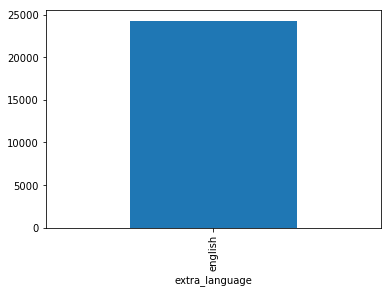

In [3]:
pdf['extra_language']='english'
pdf.groupby('extra_language').size().plot(kind='bar')

# 1. claimReview_author_name

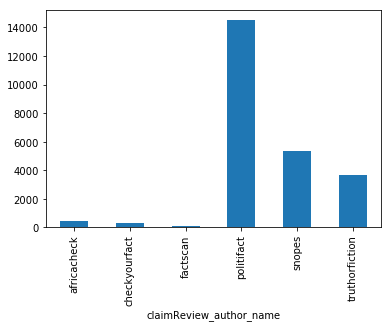

In [74]:

pdf.groupby('claimReview_author_name').size().plot(kind='bar')

# 2. Columns

In [6]:
print list(pdf.columns)

['Unnamed: 0', u'Unnamed: 0.1', u'claimReview_author_name', u'claimReview_author_url', u'claimReview_claimReviewed', u'claimReview_datePublished', u'claimReview_url', u'creativeWork_author_name', u'creativeWork_author_sameAs', u'creativeWork_datePublished', u'extra_body', u'extra_refered_links', u'extra_tags', u'extra_title', u'rating_alternateName', u'rating_bestRating', u'rating_ratingValue', u'rating_worstRating', 'extra_language']


### 2.1 Property coverage statistics per fact-checking website
#### Histograms where, -1 means 'missing value'

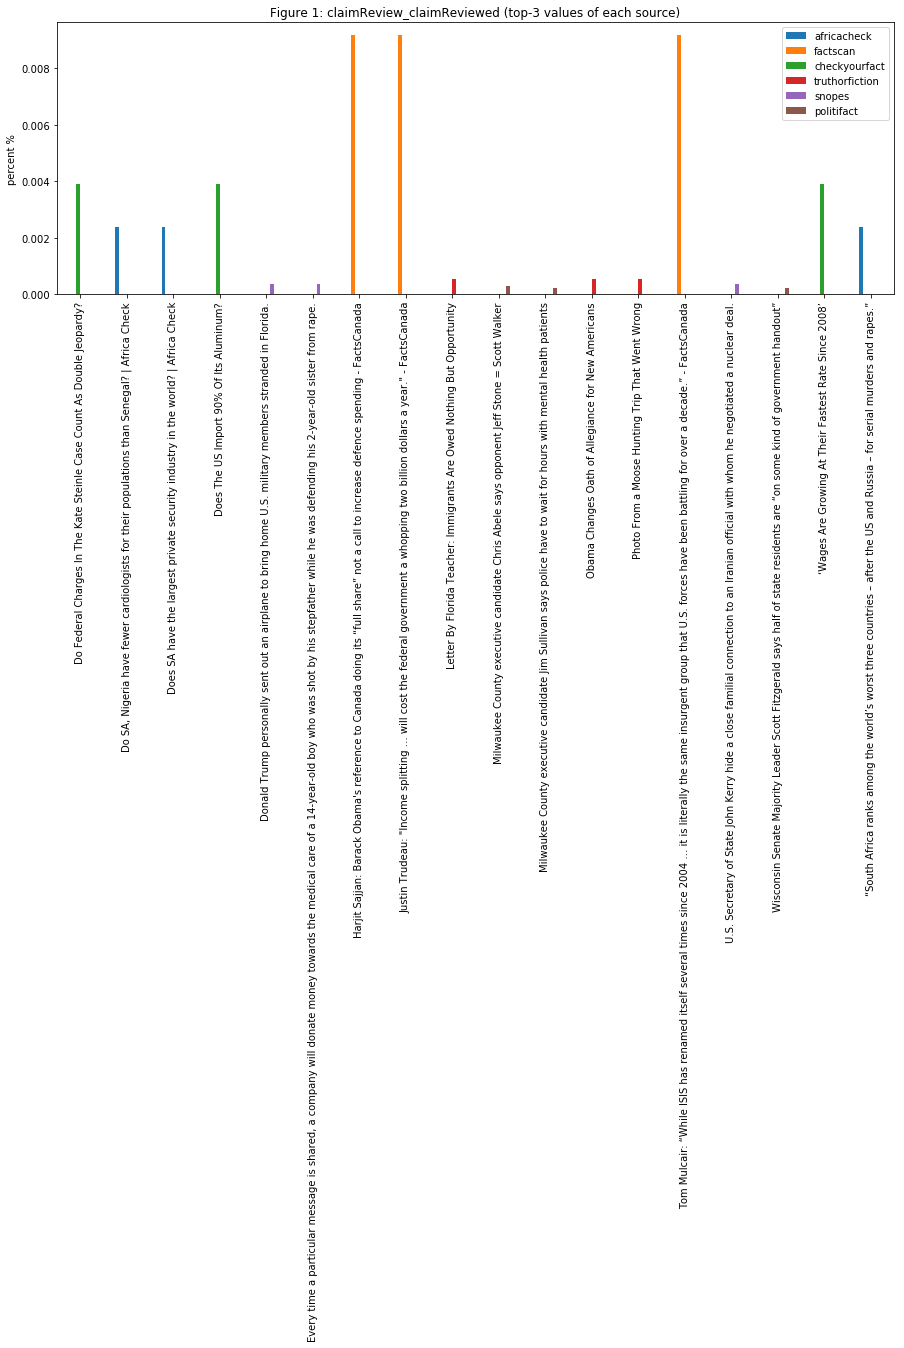

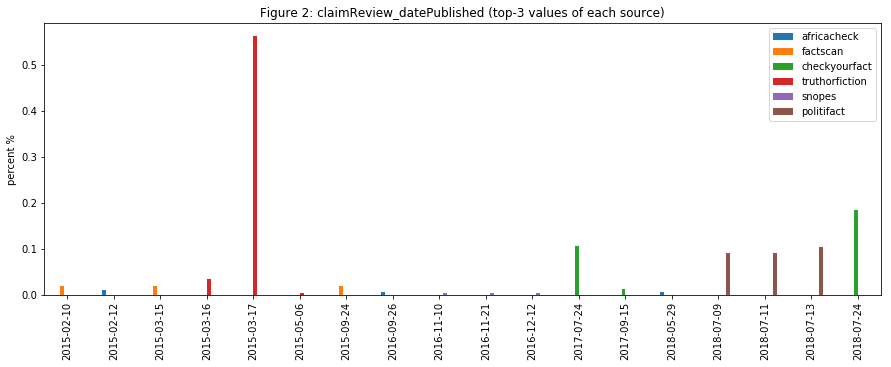

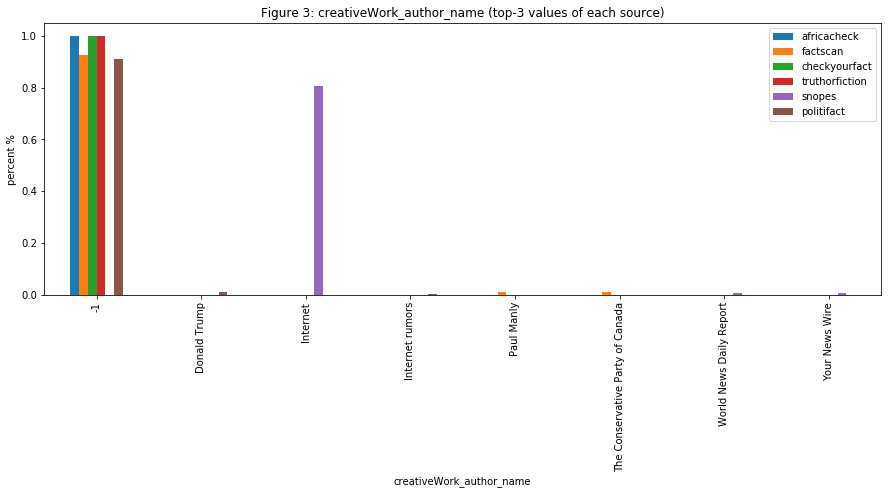

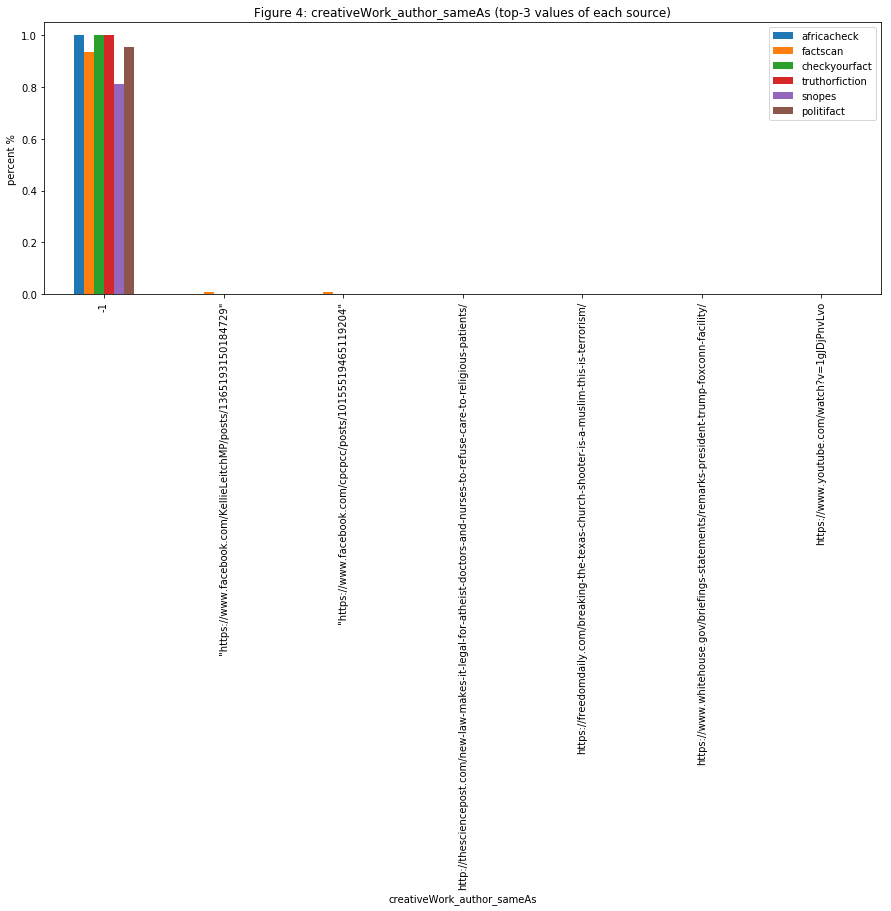

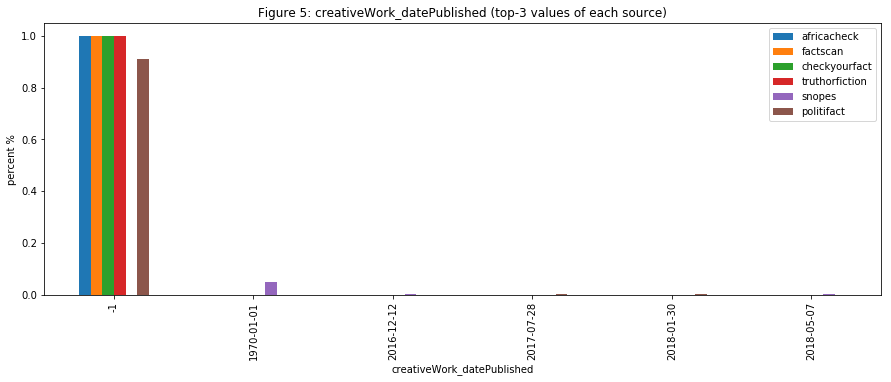

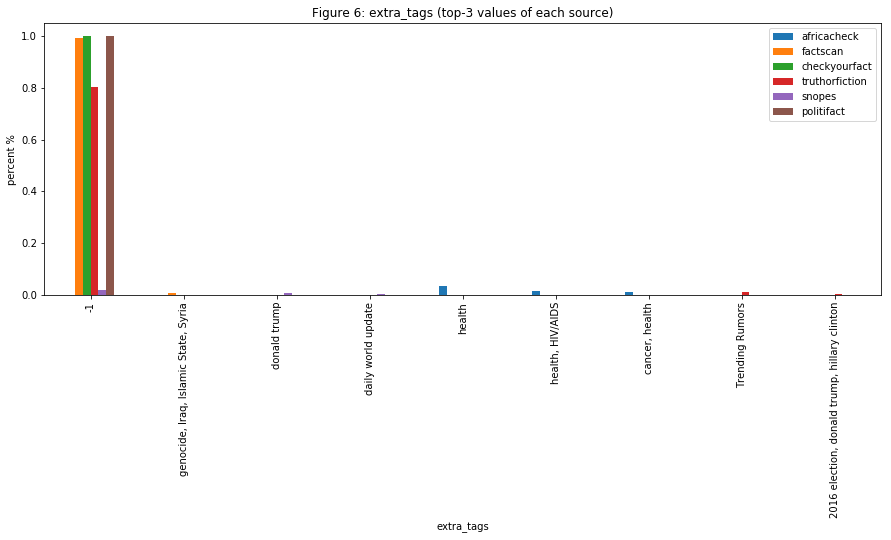

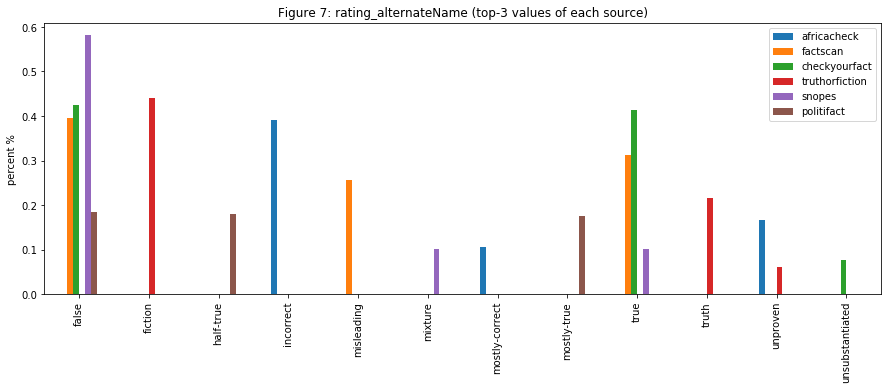

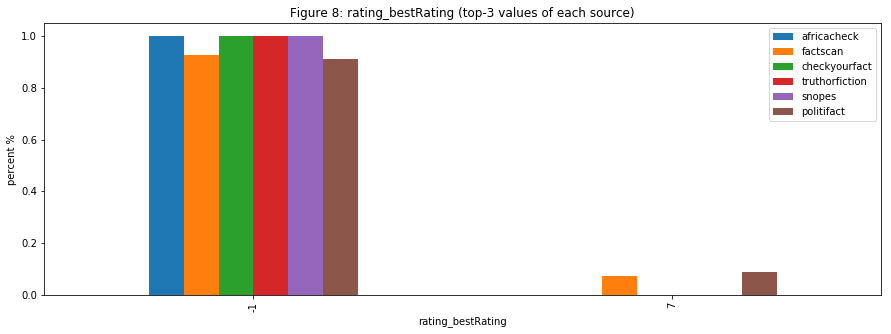

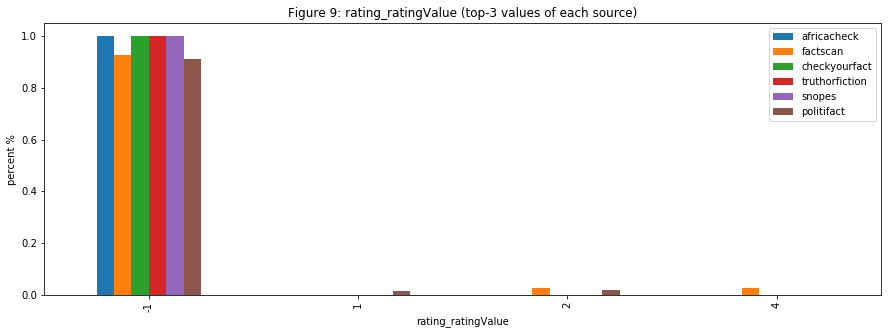

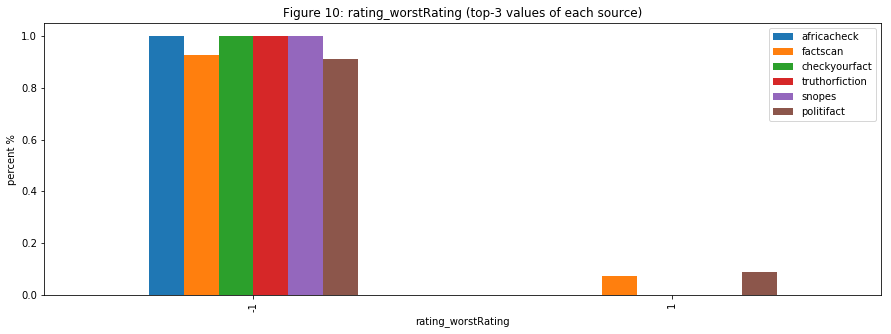

In [168]:
index_=0
for column_ in ['claimReview_claimReviewed', 'claimReview_datePublished', 'creativeWork_author_name', 'creativeWork_author_sameAs', 'creativeWork_datePublished', 'extra_tags', 'rating_alternateName', 'rating_bestRating', 'rating_ratingValue', 'rating_worstRating']:
    index_+=1
    data=[]
    authors=list(set(pdf['claimReview_author_name'].values))
    for author in authors:
        value_=pdf[pdf['claimReview_author_name']==author].fillna(-1).groupby(column_).size().sort_values(ascending=False)[:3]
        total_= len(pdf[pdf['claimReview_author_name']==author])
        data.append(value_/float(total_))
    pd_test=pd.concat(data,axis=1)
    pd_test.plot(kind='bar',figsize=(15,5) )
    plt.legend(authors)
    plt.title("Figure "+str(index_) + ": " + column_ + " (top-3 values of each source)")
    plt.ylabel("percent %")
    plt.show()
    

## 2.2 Details about rating_alternateName

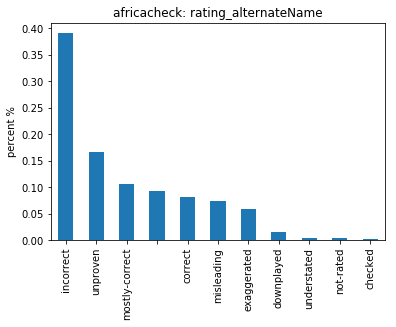

Number of different labels= 11
---


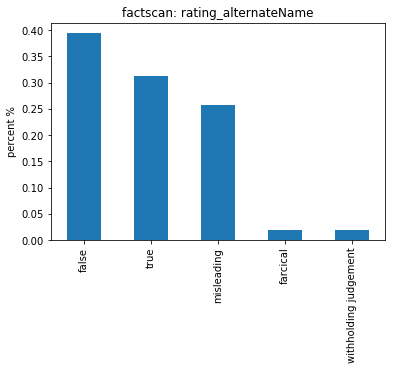

Number of different labels= 5
---


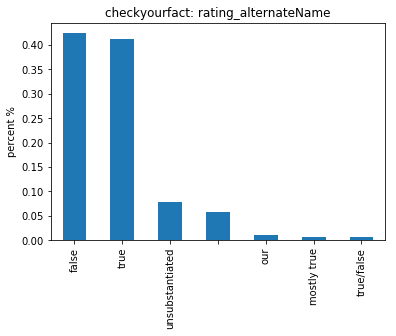

Number of different labels= 7
---


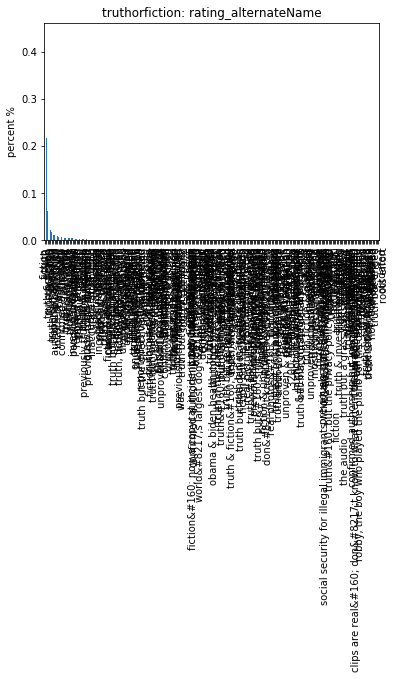

Number of different labels= 242
---


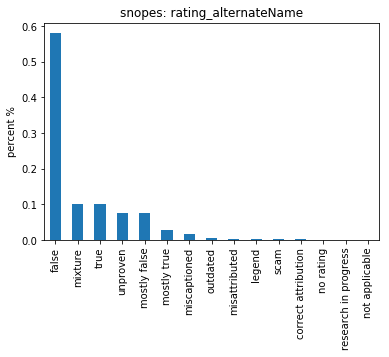

Number of different labels= 15
---


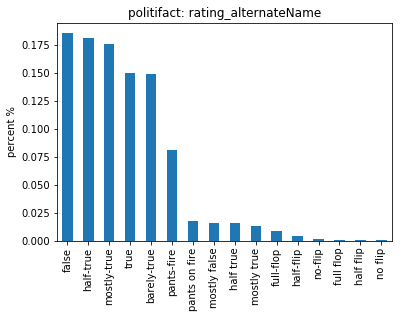

Number of different labels= 16
---


In [147]:
authors=list(set(pdf['claimReview_author_name'].values))
for author in authors:
    #value_=pdf[pdf['claimReview_author_name']==author]['rating_alternateName'].values
    #print "-" + str(author) + str(Counter(value_))
    #print "Autohr= "+str(author)
    len_=len(list(set(pdf[pdf['claimReview_author_name']==author]['rating_alternateName'].values)))
    size_=len(pdf[pdf['claimReview_author_name']==author])
    
    pdf[pdf['claimReview_author_name']==author]['rating_alternateName'].value_counts(normalize=True).plot(kind='bar')
    plt.title(str(author) + ": rating_alternateName")
    plt.ylabel("percent %")
    plt.show()
    print "Number of different labels= "+str(len_)
    print "---"



# 3. Consolidation strategy

## 3.1 Consolidation of the Rating Score. 

# Values for rating_bestRating
africacheck min=-1/max=-1
factscan min=-1/max=7
checkyourfact min=-1/max=-1
truthorfiction min=-1/max=-1
snopes min=-1/max=-1
politifact min=-1/max=7


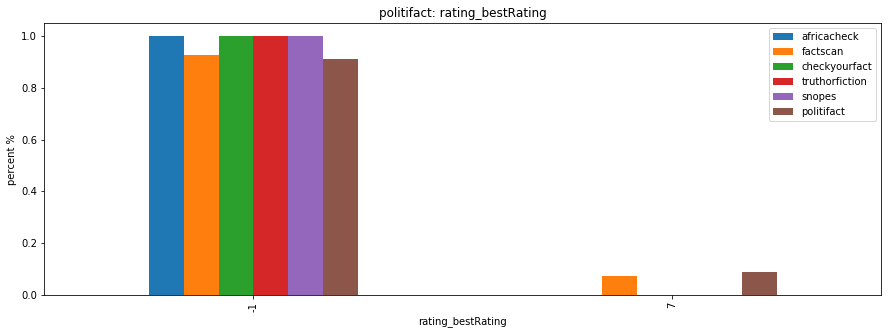

----
# Values for rating_worstRating
africacheck min=-1/max=-1
factscan min=-1/max=1
checkyourfact min=-1/max=-1
truthorfiction min=-1/max=-1
snopes min=-1/max=-1
politifact min=-1/max=1


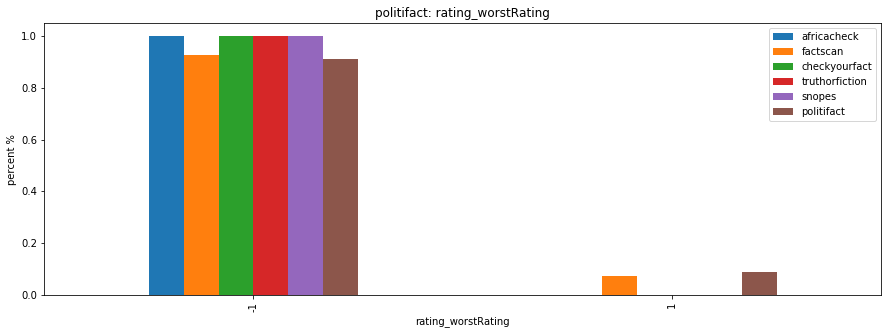

----
# Values for rating_ratingValue
africacheck min=-1/max=-1
factscan min=-1/max=5
checkyourfact min=-1/max=-1
truthorfiction min=-1/max=-1
snopes min=-1/max=-1
politifact min=-1/max=7


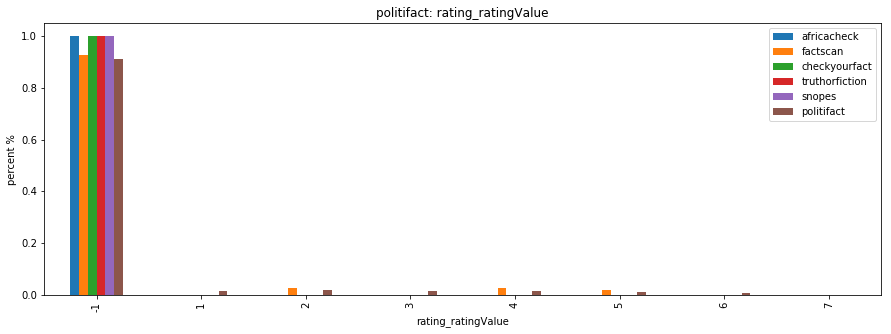

----


In [163]:
cloluns_=["rating_bestRating","rating_worstRating", "rating_ratingValue"]
authors=list(set(pdf['claimReview_author_name'].values))
for type_ in cloluns_:
    print "# Values for "+str(type_)
    data=[]

    for author in authors: 
        min_=min(list(set(pdf[pdf['claimReview_author_name']==author][type_].values)))
        max_=max(list(set(pdf[pdf['claimReview_author_name']==author][type_].values)))
        print (author) + " min=" +str(min_)+"/max="+str(max_)
        value_=pdf[pdf['claimReview_author_name']==author].dropna(subset=[type_]).groupby(type_).size().sort_values(ascending=False)
        total_= len(pdf[pdf['claimReview_author_name']==author])
        data.append(value_/float(total_))
        
    pd_test=pd.concat(data,axis=1)
    pd_test.plot(kind='bar',figsize=(15,5) )
    plt.legend(authors)
    plt.title(str(author)+": "+type_)
    plt.ylabel("percent %")
    plt.show()
    
    
    print "----"